# Unsupervised_Learning_R4_Qualitative_Bankruptcy_Project

## Please follow the below steps to complete the project ( 60 points)
1. Read the dataset and understand the features and target variable. 4 points
2. Encode independent features. 4 points
3. Separate the dependant variable from the rest of the train data 2 point
4. Split the dataset into training and test data ( Take 80:20 ratio). 2 points
5. Apply PCA on the independent features of train data. 2 point
6. Display elbow plot to find out reduced number of dimensions (which covers more than 95% of the variance). 6 points
7. Transform the data using PCA ( select optimum number of PCs). 4 points
8. Apply KMeans algorithm on the above transformed data. 6 points
9. Select optimal number of clusters and form clusters out of the train data. 10 points
10. Create a new column in the train data and populate it with the cluster labels. 4 points
11. Transform the test data using the same PCA object that was fit on the train data. 4 points
12. Use the same kmeans object, assign cluster labels to the test data and store it as a feature. 4 points
13. Apply SVC model on train dataset and predict target for test dataset. 6 points
14. Check accuracy and confusion matrix. 2 point

In [1]:
#Import all the necessary modules

# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

# Importing ploting libraries
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Importing seaborn for statistical plots
import seaborn as sns

import pandas as pd
import numpy as np

# To let us break the X and y dataframes into training set and test set. We need to use
# Sklearn package's data splitting function which is based on random function
from sklearn import model_selection
from sklearn.model_selection import train_test_split

# Calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# For preprocessing the data
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from scipy.stats import zscore


In [2]:
# Load the data into a dataframe
colnames = ["Industrial Risk", "Management Risk", "Financial Flexibility", "Credibility", "Competitiveness", "Operating Risk", "Class"]
QB_df=pd.read_csv("Qualitative_Bankruptcy.data.txt", names = colnames) 
QB_df.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB


In [3]:
# High level statistics analysis 
QB_df.describe().transpose()

,count,unique,top,freq
Industrial Risk,250,3,N,89
Management Risk,250,3,N,119
Financial Flexibility,250,3,N,119
Credibility,250,3,N,94
Competitiveness,250,3,N,103
Operating Risk,250,3,N,114
Class,250,2,NB,143


In [4]:
for col in QB_df:
    print (col)
    print (QB_df[col].unique())

Industrial Risk
['P' 'N' 'A']
Management Risk
['P' 'N' 'A']
Financial Flexibility
['A' 'P' 'N']
Credibility
['A' 'P' 'N']
Competitiveness
['A' 'P' 'N']
Operating Risk
['P' 'N' 'A']
Class
['NB' 'B']


In [5]:
QB_df.shape

(250, 7)

In [6]:
QB_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
Industrial Risk          250 non-null object
Management Risk          250 non-null object
Financial Flexibility    250 non-null object
Credibility              250 non-null object
Competitiveness          250 non-null object
Operating Risk           250 non-null object
Class                    250 non-null object
dtypes: object(7)
memory usage: 13.8+ KB


In [7]:
QB_df.dtypes

Industrial Risk          object
Management Risk          object
Financial Flexibility    object
Credibility              object
Competitiveness          object
Operating Risk           object
Class                    object
dtype: object

In [8]:
# To check for any missing data
QB_df.isnull().sum()

Industrial Risk          0
Management Risk          0
Financial Flexibility    0
Credibility              0
Competitiveness          0
Operating Risk           0
Class                    0
dtype: int64

In [9]:
# To check for any missing data
QB_df.isna().sum()

Industrial Risk          0
Management Risk          0
Financial Flexibility    0
Credibility              0
Competitiveness          0
Operating Risk           0
Class                    0
dtype: int64

In [10]:
# To check if all the data values are real or not
QB_df[~QB_df.applymap(np.isreal).all(1)]

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB
...,...,...,...,...,...,...,...
245,N,N,A,N,N,N,B
246,P,N,N,N,N,N,B
247,A,N,N,N,N,N,B
248,N,N,N,N,N,N,B


In [11]:
print("Class Distribution: For Non-Bankruptcy and Bankruptcy values\n",QB_df["Class"].value_counts())

Class Distribution: For Non-Bankruptcy and Bankruptcy values
 NB    143
B     107
Name: Class, dtype: int64


In [12]:
# Distribution plots with different columns combinations
#sns.FacetGrid(QB_df,hue="Class",height=5).map(sns.distplot,"Industrial Risk").add_legend()
#plt.show()

In [13]:
# Encode the features
LE = LabelEncoder()
QBE_df=QB_df.drop('Class', axis=1)
QBE_df.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk
0,P,P,A,A,A,P
1,N,N,A,A,A,N
2,A,A,A,A,A,A
3,P,P,P,P,P,P
4,N,N,P,P,P,N


In [14]:
#QBE_df.apply(LE)
QBE_df["Industrial Risk"]= LE.fit_transform(QBE_df["Industrial Risk"])
QBE_df["Management Risk"]=LE.fit_transform(QBE_df["Management Risk"])
QBE_df["Financial Flexibility"]=LE.fit_transform(QBE_df["Financial Flexibility"])
QBE_df["Credibility"]=LE.fit_transform(QBE_df["Credibility"])
QBE_df["Competitiveness"]=LE.fit_transform(QBE_df["Competitiveness"])
QBE_df["Operating Risk"]=LE.fit_transform(QBE_df["Operating Risk"])
QBE_df.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk
0,2,2,0,0,0,2
1,1,1,0,0,0,1
2,0,0,0,0,0,0
3,2,2,2,2,2,2
4,1,1,2,2,2,1


In [15]:
QBE_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Industrial Risk,250.0,0.996,0.804096,0.0,0.0,1.0,2.0,2.0
Management Risk,250.0,0.972,0.724788,0.0,0.0,1.0,1.0,2.0
Financial Flexibility,250.0,0.932,0.722123,0.0,0.0,1.0,1.0,2.0
Credibility,250.0,1.008,0.791481,0.0,0.0,1.0,2.0,2.0
Competitiveness,250.0,1.140,0.755435,0.0,1.0,1.0,2.0,2.0
Operating Risk,250.0,1.088,0.733764,0.0,1.0,1.0,2.0,2.0


In [16]:
QBE_df.corr()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk
Industrial Risk,1.000000,0.110063,0.068694,-0.050432,0.060428,0.177573
Management Risk,0.110063,1.000000,-0.018999,-0.006609,-0.132174,0.253851
Financial Flexibility,0.068694,-0.018999,1.000000,-0.020124,0.150036,-0.064455
Credibility,-0.050432,-0.006609,-0.020124,1.000000,0.092155,0.054104
Competitiveness,0.060428,-0.132174,0.150036,0.092155,1.000000,-0.073031
Operating Risk,0.177573,0.253851,-0.064455,0.054104,-0.073031,1.000000


Inference - Correlation between different variables are between -0.5 to 0.5, Conclusion - all variables should be considered for the development of the prediction model.

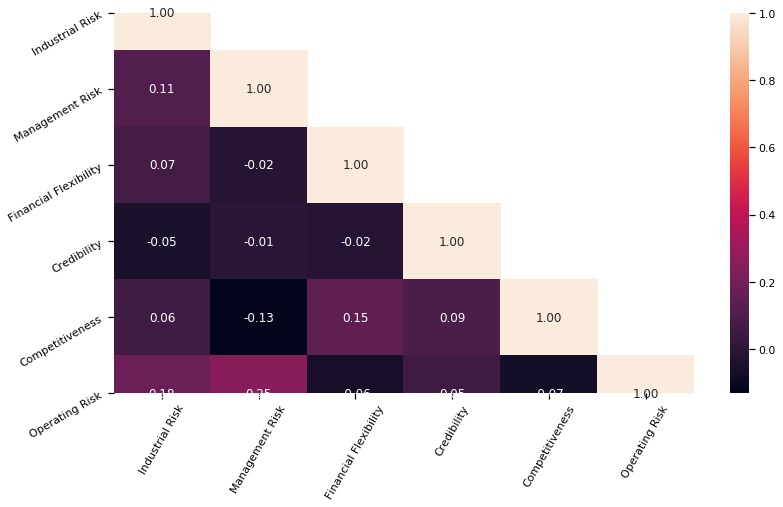

In [17]:
#Graphical representation of correlations between features
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
mask = np.zeros_like(QBE_df.corr())
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(QBE_df.corr(),mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=60)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

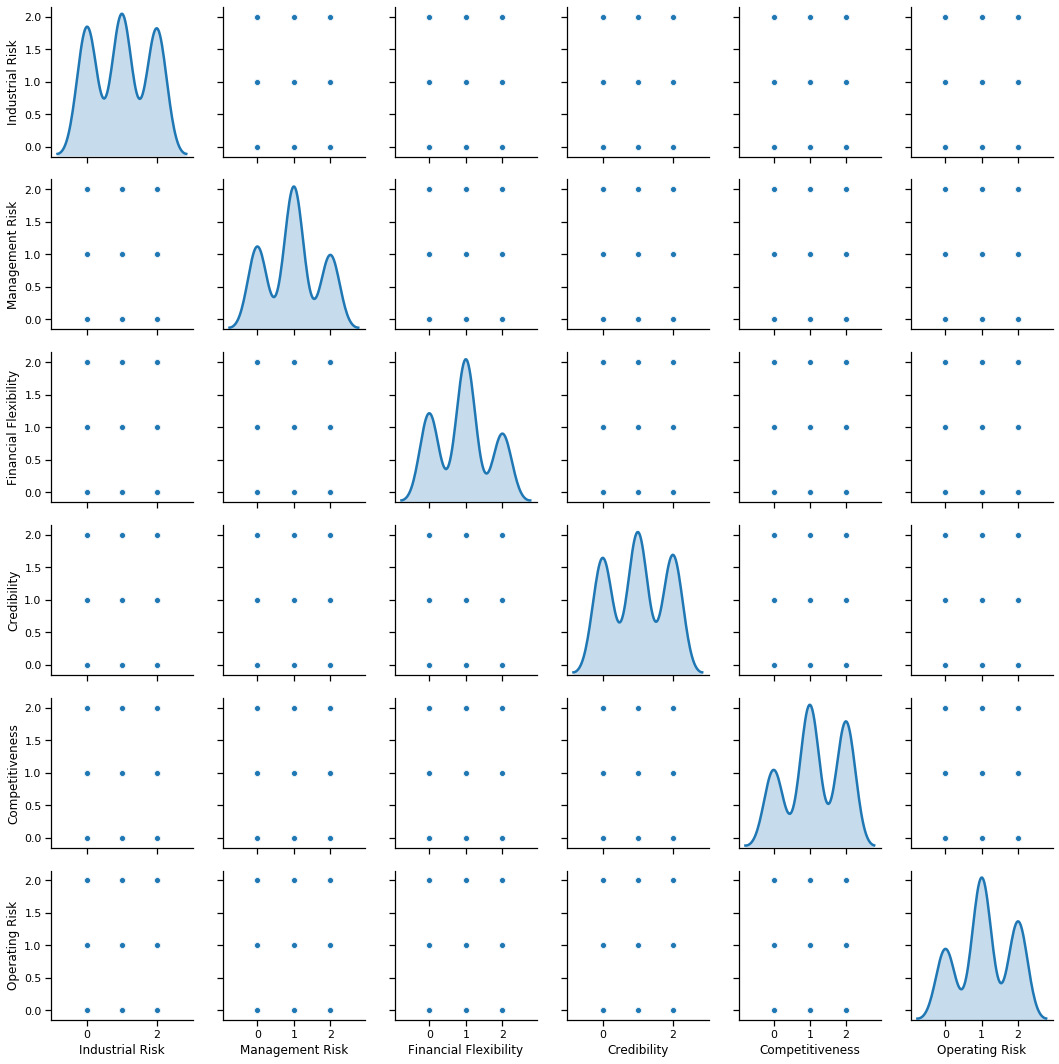

In [18]:
sns.pairplot(QBE_df,diag_kind='kde')
plt.show()

In [19]:
OHE = OneHotEncoder(categories='auto')
features = OHE.fit_transform(QBE_df).toarray()
labels = QB_df["Class"]
LE = LabelEncoder()
labels = LE.fit_transform(labels)
features

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 1., 0., 0.]])

In [20]:
features.shape

(250, 18)

In [21]:
unique, counts = np.unique(labels, return_counts=True)
print("Class Distribution for Bankruptcy and Non-Bankruptcy values\n",dict(zip(unique, counts)))
new_labels = labels
print(labels,'\n', new_labels)

Class Distribution for Bankruptcy and Non-Bankruptcy values
 {0: 107, 1: 143}
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [22]:
#labels = OHE.fit_transform(labels)
#labels

In [23]:
labels.shape

(250,)

In [24]:
# Create Train Test Data
X_train,X_test,Y_train,Y_test=train_test_split(features, labels, test_size=0.2, random_state=9)
print("X_train shape -- > {}".format(X_train.shape))
print("Y_train shape -- > {}".format(Y_train.shape))
print("X_test shape -- > {}".format(X_test.shape))
print("Y_test shape -- > {}".format(Y_test.shape))

X_train shape -- > (200, 18)
Y_train shape -- > (200,)
X_test shape -- > (50, 18)
Y_test shape -- > (50,)


In [25]:
# Apply PCA on the independent features of train data
pca = PCA(n_components =  None)
pca.fit(X_train)
var_explained = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_explained)
print("Variance Values \n" , var_explained , '\n')
print("Cummulative Variance Values \n" , cum_var_exp)

Variance Values 
 [2.78908132e-01 1.21293162e-01 1.02686484e-01 8.91214863e-02
 7.94909755e-02 7.31844563e-02 6.61240334e-02 5.74366541e-02
 4.93071013e-02 4.38010415e-02 2.51524704e-02 1.34940025e-02
 7.24190878e-33 3.83305002e-33 2.54229236e-33 2.17291763e-33
 8.20227356e-34 3.30083823e-34] 

Cummulative Variance Values 
 [0.27890813 0.40020129 0.50288778 0.59200926 0.67150024 0.7446847
 0.81080873 0.86824538 0.91755249 0.96135353 0.986506   1.
 1.         1.         1.         1.         1.         1.        ]


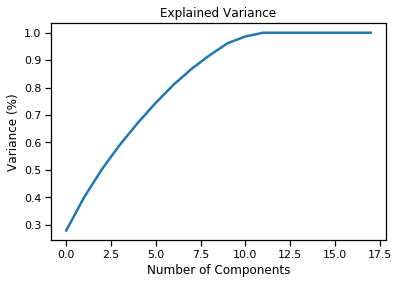

In [26]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(cum_var_exp)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

Note : This clearly shows the first 10 PCA components cover more than 95% of the variance , and that would be the value

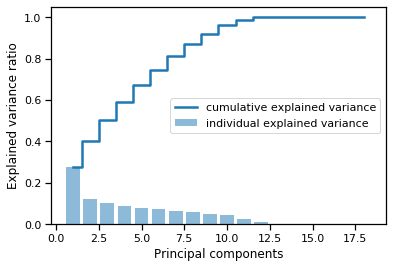

In [27]:
plt.bar(range(1,19), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,19), cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

Note : This clearly shows the first 10 PCA components cover more than 95% of the variance , and that would be the value

In [28]:
pca = PCA(n_components = 10)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.27890813, 0.12129316, 0.10268648, 0.08912149, 0.07949098,
       0.07318446, 0.06612403, 0.05743665, 0.0493071 , 0.04380104])

In [29]:
#Fitting Logistic Regression to the Training set
classifier = LogisticRegression(solver='lbfgs')
classifier.fit(X_train, Y_train)
#Predicting the Test set results
Y_pred = classifier.predict(X_test)
print("Logistic Regression classifier, got {}% accuracy on the test set.".format(accuracy_score(Y_test, Y_pred)*100))
pd.DataFrame(
    confusion_matrix(Y_test, Y_pred),
    columns=['Predicted Non-Bankrupt', 'Predicted Bankrupt'],
    index=['True Non-Bankrupt', 'True Bankrupt']
)

Logistic Regression classifier, got 100.0% accuracy on the test set.


,Predicted Non-Bankrupt,Predicted Bankrupt
True Non-Bankrupt,18,0
True Bankrupt,0,32


In [30]:
# Transform the data using PCA by selecting optimum number of PCs
pca = PCA(n_components = 10)
pcaData = pca.fit_transform(features)
pcaData

array([[-1.21429681, -0.30905586, -0.36415638, ..., -0.10815636,
         0.01709026,  0.3463237 ],
       [-0.15037526, -1.34723634, -0.5319487 , ...,  0.03340136,
         0.27988866, -0.18495616],
       [-0.93987198,  0.83208713, -0.69562644, ...,  0.11193231,
         0.40861255,  0.20143754],
       ...,
       [ 1.35996565,  0.39199994,  0.05760053, ...,  0.46918259,
        -0.57338904, -0.52207653],
       [ 1.61247086, -0.50248683,  0.00217625, ..., -0.09839023,
         0.10351508, -0.06709237],
       [ 0.5626136 ,  0.21474643, -0.24570969, ...,  0.92080142,
        -0.01450442,  0.62472739]])

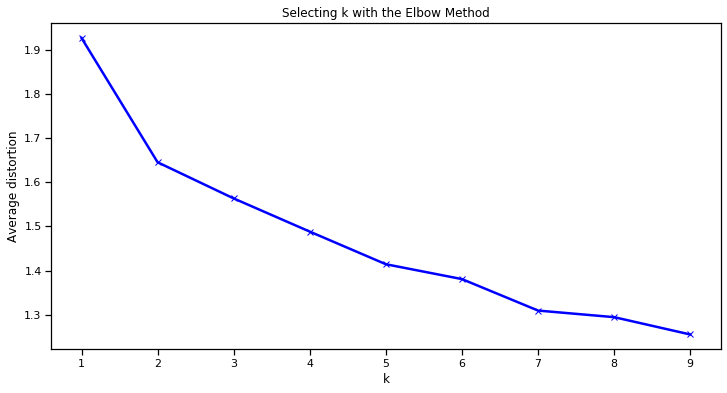

In [31]:
# Finding optimal no. of clusters
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(pcaData)
    prediction=model.predict(pcaData)
    meanDistortions.append(sum(np.min(cdist(pcaData, model.cluster_centers_, 'euclidean'), axis=1)) / pcaData.shape[0])

# Elbow method
plt.figure(figsize=(12,6))
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')
plt.show()

Note : This clearly shows the Elbow bend occuring at value 2, which is the K value

   num_clusters  cluster_errors
0             1      742.318739
1             2      549.603305
2             3      492.182831
3             4      449.697082
4             5      412.149913
5             6      382.502910
6             7      358.439482
7             8      337.640991
8             9      323.338933


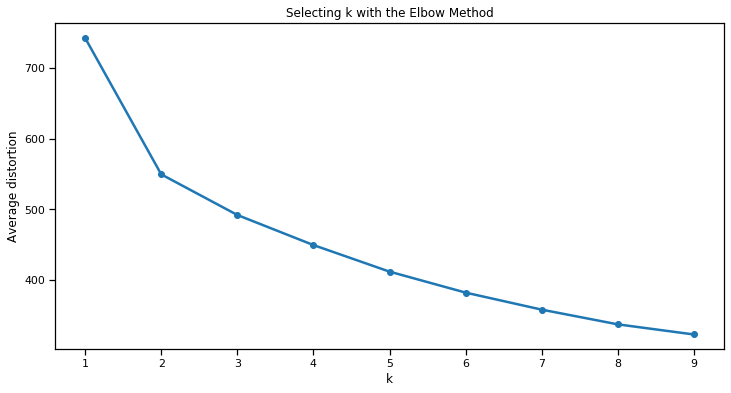

In [32]:
# Let us check optimal number of clusters 
from sklearn.cluster import KMeans
X_std = pca.fit_transform(X_train)
cluster_range = range( 1, 10)   
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 100,init='k-means++',random_state=0)
  clusters.fit(X_std)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  
# Combining the cluster_range and cluster_errors into a dataframe
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
print(clusters_df[0:100])

# Elbow plot
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')
plt.show()

Note : This clearly shows the Elbow bend occuring at value 2, which is the K value

In [36]:
# Let us first start with K = 2
final_model=KMeans(2)
final_model.fit(X_std)
prediction=final_model.predict(pcaData)
unique, counts = np.unique(prediction, return_counts=True)
print("Class Distribution values\n",dict(zip(unique, counts)))
prediction

Class Distribution values
 {0: 107, 1: 143}


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [37]:
prediction.shape

(250,)

In [38]:
QB_df

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB
...,...,...,...,...,...,...,...
245,N,N,A,N,N,N,B
246,P,N,N,N,N,N,B
247,A,N,N,N,N,N,B
248,N,N,N,N,N,N,B


In [39]:
# Append the prediction 
QB_df["Predicted Value"] = prediction
print("Prediction Added : \n")
QB_df

Prediction Added : 



,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class,Predicted Value
0,P,P,A,A,A,P,NB,1
1,N,N,A,A,A,N,NB,1
2,A,A,A,A,A,A,NB,1
3,P,P,P,P,P,P,NB,1
4,N,N,P,P,P,N,NB,1
...,...,...,...,...,...,...,...,...
245,N,N,A,N,N,N,B,0
246,P,N,N,N,N,N,B,0
247,A,N,N,N,N,N,B,0
248,N,N,N,N,N,N,B,0


In [40]:
# Append the prediction 
QBE_df["Predicted Values"] = prediction
print("Prediction Added : \n")
QBE_df

Prediction Added : 



,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Predicted Values
0,2,2,0,0,0,2,1
1,1,1,0,0,0,1,1
2,0,0,0,0,0,0,1
3,2,2,2,2,2,2,1
4,1,1,2,2,2,1,1
...,...,...,...,...,...,...,...
245,1,1,0,1,1,1,0
246,2,1,1,1,1,1,0
247,0,1,1,1,1,1,0
248,1,1,1,1,1,1,0


In [41]:
QBE_df["Industrial Risk"]= LE.fit_transform(QBE_df["Industrial Risk"])
QBE_df["Management Risk"]=LE.fit_transform(QBE_df["Management Risk"])
QBE_df["Financial Flexibility"]=LE.fit_transform(QBE_df["Financial Flexibility"])
QBE_df["Credibility"]=LE.fit_transform(QBE_df["Credibility"])
QBE_df["Competitiveness"]=LE.fit_transform(QBE_df["Competitiveness"])
QBE_df["Operating Risk"]=LE.fit_transform(QBE_df["Operating Risk"])
QBE_df["Predicted Values"]=LE.fit_transform(QBE_df["Predicted Values"])
QBE_df.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Predicted Values
0,2,2,0,0,0,2,1
1,1,1,0,0,0,1,1
2,0,0,0,0,0,0,1
3,2,2,2,2,2,2,1
4,1,1,2,2,2,1,1


In [59]:
new_features = OHE.fit_transform(QBE_df,"categories='auto'").toarray()
print(new_features.shape)
new_features

(250, 20)


array([[0., 0., 1., ..., 1., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [43]:
print(labels,'\n')
print(new_labels)

[2 2 1 3 7 8 1 0 8 0 1 6 7 5 3 6 0 5 7 7 6 7 0 2 8 1 1 1 0 4 4 0 7 1 7 3 0
 2 4 4 0 3 5 6 2 7 1 7 4 0 5 0 4 7 2 0 1 8 8 1 6 7 7 0 3 8 2 1 3 2 0 8 5 0
 7 5 0 0 7 7 0 2 2 6 1 3 5 1 0 3 2 7 7 4 3 5 5 1 6 2 5 4 5 5 2 7 3 0 6 3 3
 7 1 1 5 7 6 5 5 6 8 4 2 7 5 3 2 0 2 0 1 5 0 1 3 1 8 8 8 7 5 8 5 1 4 5 1 0
 0 3 4 7 5 3 5 2 5 7 0 1 5 0 0 8 7 4 3 8 6 1 1 1 1 1 5 1 3 6 7 1 7 8 6 7 7
 5 0 5 3 1 8 4 1 3 4 1 1 7 4 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [44]:
# Create Train Test Data
Xn_train,Xn_test,Yn_train,Yn_test=train_test_split(new_features, new_labels, test_size=0.2, random_state=9)
print("X_train shape -- > {}".format(X_train.shape))
print("Y_train shape -- > {}".format(Y_train.shape))
print("X_test shape -- > {}".format(X_test.shape))
print("Y_test shape -- > {}".format(Y_test.shape))

X_train shape -- > (200, 20)
Y_train shape -- > (200,)
X_test shape -- > (50, 20)
Y_test shape -- > (50,)


In [45]:
print("X_train values -- > {}",Xn_train)
print("Y_train values -- > {}",Yn_train)
print("X_test values -- > {}",Xn_test)
print("Y_test values -- > {}",Yn_test)

X_train values -- > {} [[1. 0. 0. ... 1. 0. 1.]
 [1. 0. 0. ... 1. 0. 1.]
 [0. 1. 0. ... 0. 0. 1.]
 ...
 [0. 0. 1. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 1.]]
Y_train values -- > {} [1 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1
 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 1 1 1 0 1
 1 0 1 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0
 0 1 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 0 0 1 1 1 0
 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0
 1 1 1 1 0 1 1 1 0 1 0 0 0 1 1]
X_test values -- > {} [[1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1.]
 [0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0.]
 [0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0

In [70]:
pca = PCA(n_components = 10)
Xp_train = pca.fit_transform(X_train)
Xp_test = pca.transform(X_test)

print("X_train shape -- > {}".format(Xp_train.shape))
print("X_test shape -- > {}".format(Xp_test.shape), '\n')

print("X_train values -- > {}",Xp_train, '\n')
print("X_test values -- > {}",Xp_test)

X_train shape -- > (200, 10)
X_test shape -- > (50, 10) 

X_train values -- > {} [[-1.38708635e+00  7.63992241e-01 -1.19857992e+00 ... -2.69475810e-01
   5.47020368e-02  6.80393851e-04]
 [-1.38708635e+00  7.63992241e-01 -1.19857992e+00 ... -2.69475810e-01
   5.47020368e-02  6.80393851e-04]
 [-6.24496361e-01 -1.08458680e+00 -7.02793562e-01 ... -4.98409824e-02
  -3.05603725e-01 -2.03605958e-01]
 ...
 [ 8.86291519e-01  4.29142542e-01 -4.45594599e-01 ... -6.16333374e-01
  -3.27943881e-01  6.42036767e-01]
 [-4.92512258e-01  4.64705865e-01  1.52703660e-01 ... -5.47627145e-01
   8.12932537e-01  3.28385102e-01]
 [-6.89525621e-01 -1.50107009e+00  5.36186663e-01 ... -2.23156804e-01
  -4.99134129e-02 -3.42982946e-01]] 

X_test values -- > {} [[-9.02378942e-01  1.12742132e+00  2.40477213e-01 -5.16027714e-01
   5.04170581e-01  3.06451120e-01  3.85116958e-01  4.17333702e-01
   5.03033638e-01 -6.64932448e-01]
 [-7.63910199e-01  5.39213480e-01  7.38123324e-01  3.70568829e-01
  -1.85839008e-01 -1.15549

In [38]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
# Fitting the input data
kmeans = kmeans.fit(X_std)
# Getting the cluster labels
cluster_labels = kmeans.predict(X_std)
# Centroid values
centroids = kmeans.cluster_centers_
# Comparing with scikit-learn centroids
print("sklearn")
print("Centroid values")
print(centroids) # From sci-kit learn
print("labels")
print(cluster_labels) # From sci-kit learn

sklearn
Centroid values
[[ 1.08554313  0.10949143 -0.02443762  0.08847046 -0.00892559  0.01643239
   0.03349952  0.03149856  0.00863124  0.02024227]
 [-0.87039044 -0.08779043  0.01959413 -0.07093577  0.00715655 -0.01317552
  -0.02685997 -0.0252556  -0.00692055 -0.01623029]]
labels
[1 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1
 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 1 1 1 0 1
 1 0 1 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 1 1 1 0 0 1 1 1 0 1 0 1 0
 0 1 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 0 0 1 1 1 0
 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0
 1 1 1 1 0 1 1 1 0 1 0 0 0 1 1]


In [72]:
cluster_labels.shape

(200,)

In [73]:
Xp_train=np.column_stack([Xp_train,cluster_labels])
Xp_train.shape

(200, 11)

In [75]:
cluster_labels = kmeans.predict(Xp_test)
Xp_test=np.column_stack([Xp_test,cluster_labels])
Xp_test.shape

(50, 11)

In [76]:
clf = svm.SVC(gamma=0.025, C=3, kernel='linear') 
clf.fit(Xp_train , Y_train)

SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.025, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [77]:
Y_pred = clf.predict(Xp_test)

In [78]:
type(Y_pred)

numpy.ndarray

In [79]:
type(Y_train)

numpy.ndarray

In [80]:
def getAccuracy(testSet, predictions):
	correct = 0
	for x in range(len(testSet)):
		if testSet[x]== predictions[x]:
			correct += 1
	return (correct/float(len(testSet))) * 100.0

In [81]:
getAccuracy(Y_test , Y_pred)

100.0

In [82]:
print("SVM classifier, got {}% accuracy on the test set.".format(getAccuracy(Y_test , Y_pred)))
pd.DataFrame(
    confusion_matrix(Y_test, Y_pred),
    columns=['Predicted Non-Bankrupt', 'Predicted Bankrupt'],
    index=['True Non-Bankrupt', 'True Bankrupt']
)

SVM classifier, got 100.0% accuracy on the test set.


,Predicted Non-Bankrupt,Predicted Bankrupt
True Non-Bankrupt,18,0
True Bankrupt,0,32
